# PROJECT - PREDICTING THE MEDIAN HOUSING PRICE 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import os
# import tarfile
# from six.moves import urllib
# DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# HOUSING_PATH = os.path.join("datasets", "housing")
# HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     if not os.path.isdir(housing_path):
#         os.makedirs(housing_path)
#         tgz_path = os.path.join(housing_path, "housing.tgz")
#         urllib.request.urlretrieve(housing_url, tgz_path)
#         housing_tgz = tarfile.open(tgz_path)
#         housing_tgz.extractall(path=housing_path)
#         housing_tgz.close()

In [3]:
# import pandas as pd
# def load_housing_data(housing_path=HOUSING_PATH):
#     csv_path = os.path.join(housing_path, "housing.csv")
#     return pd.read_csv(csv_path)

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

H = load_housing_data()

In [5]:
H

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [6]:
H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# only total_bedrooms column contains null values 

In [8]:
H.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [9]:
# CHECKING the value counts since it is of the type object so it can contain any type of python object 
H["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
H.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [11]:
H.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [12]:
# plotting histogram to know the type of data and the distribution of the data 

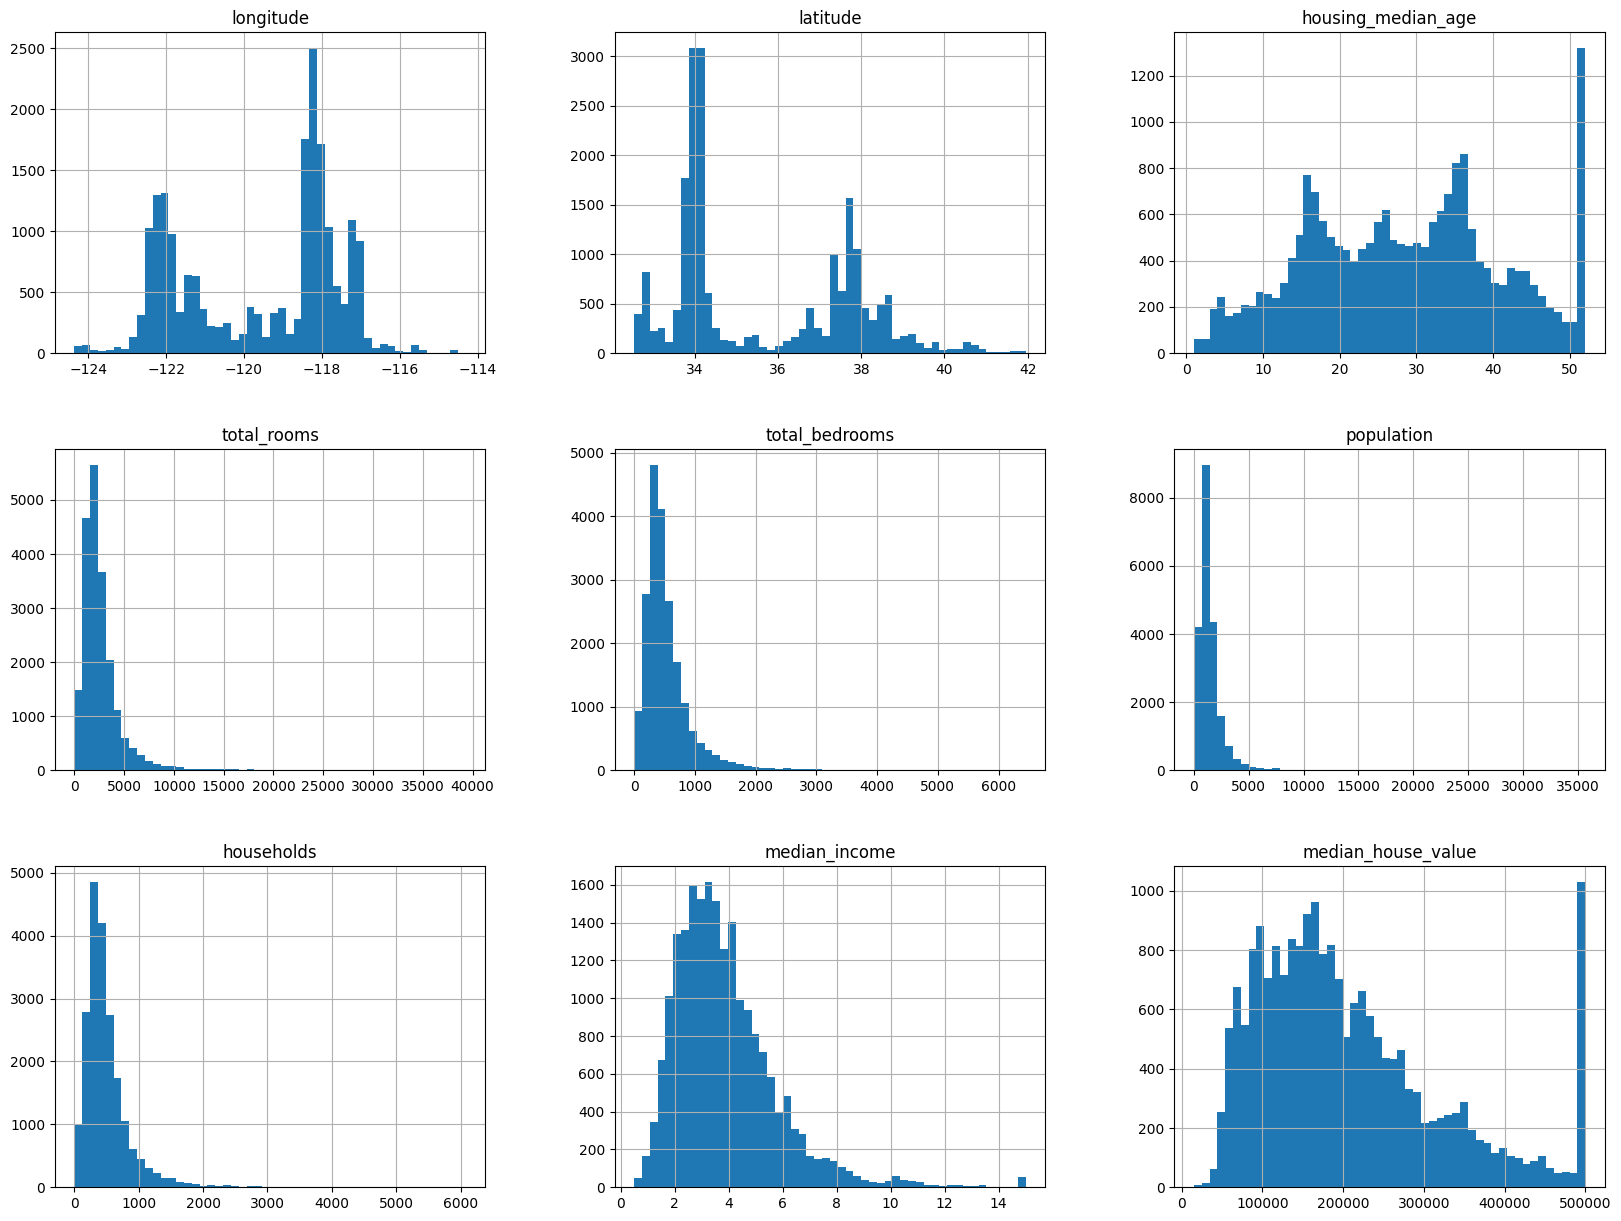

In [13]:
H.hist(bins=50, figsize=(20,15))
plt.show()
#this shows the plot of all the numerical columns instead of specifying separatly. All except ocean proximity is ploted
# as it of the type object 

In [14]:
# since all attributes have different scales, we hvae to perform feature scaling 

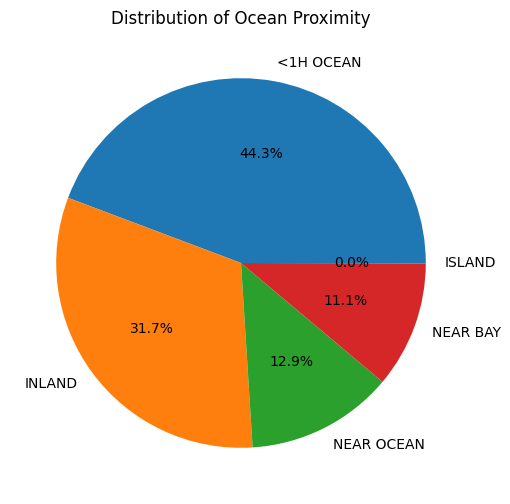

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = H['ocean_proximity'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ocean Proximity')  # Set the title (optional)
plt.show()


In [16]:
H['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# creating test set 

In [17]:
# creating test test to avoid data snooping 

In [18]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [19]:
train_set, test_set = shuffle_and_split_data(H, 0.2)
len(train_set)
# 80-20 split

16512

In [20]:
len(test_set)

4128

In [21]:
# To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [22]:
np.random.seed(42)

In [23]:
H.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [24]:
# By following this approach, the test set will remain consistent across multiple runs,
# even if you update or refresh the dataset. The test set will include 20% of the new instances
# in the updated dataset, but it will not contain any instances that were previously part of the training set.

In [25]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [26]:
housing_with_id = H.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

# alternate method 

In [27]:
housing_with_id["id"] = H["longitude"] * 1000 + H["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(H, test_size=0.2, random_state=42)


In [29]:
test_set["total_bedrooms"].isnull().sum()

44

In [30]:
H["income_cat"] = pd.cut(H["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

<Axes: >

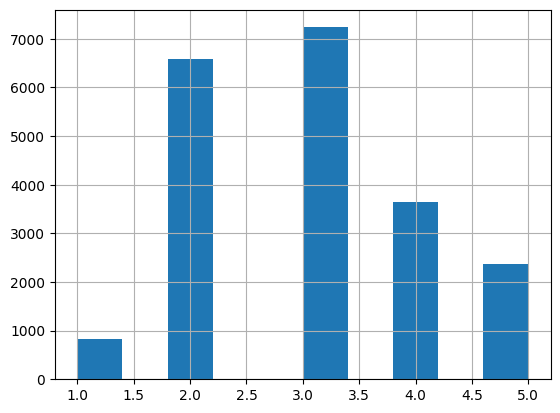

In [31]:
H["income_cat"].hist()

In [32]:
# we now can do sampling based on each income category 

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(H, H["income_cat"]):
    strat_train_set = H.loc[train_index]
    strat_test_set = H.loc[test_index]

In [34]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [35]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [36]:
housing = strat_train_set.copy()
# Making a copy of the train data set 

# data visualization 

<Axes: xlabel='longitude', ylabel='latitude'>

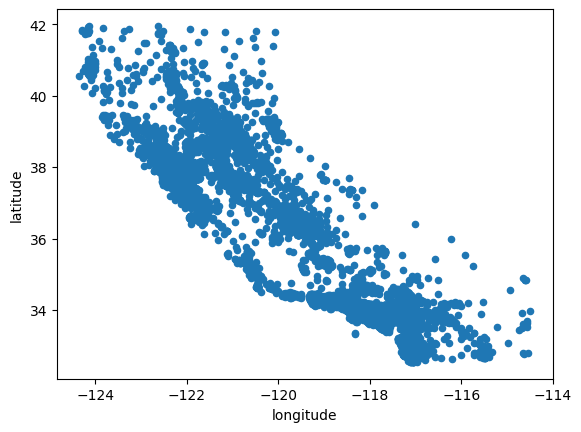

In [37]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

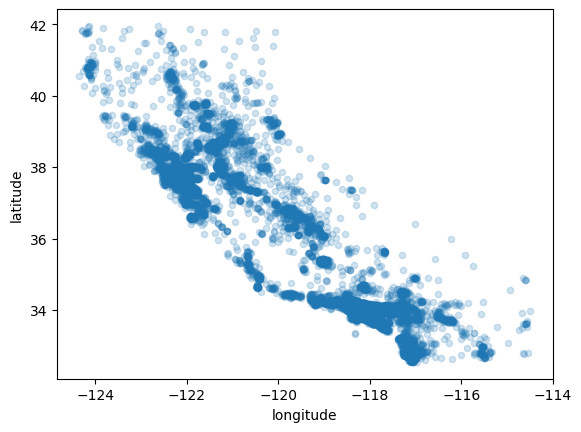

In [38]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

# after incorporating alpha parameter for tranparancy 

In [39]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
import plotly.express as px
import plotly.graph_objects as go


In [41]:
import plotly.express as px

fig = px.scatter(H, x="longitude", y="latitude", size="population",
                 color="median_house_value", hover_name="population",
                 labels={"median_house_value": "Median House Value"},
                 title="Housing Prices Scatter Plot",
                 range_color=(H["median_house_value"].min(),
                              H["median_house_value"].max()),
                 color_continuous_scale="Jet")

fig.update_layout(
    showlegend=True,
    xaxis=dict(title="Longitude"),
    yaxis=dict(title="Latitude"),
    coloraxis_colorbar=dict(title="Median House Value")
)

fig.show()


In [42]:
duplicates = H[H.duplicated()]
num_duplicates = len(duplicates)
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

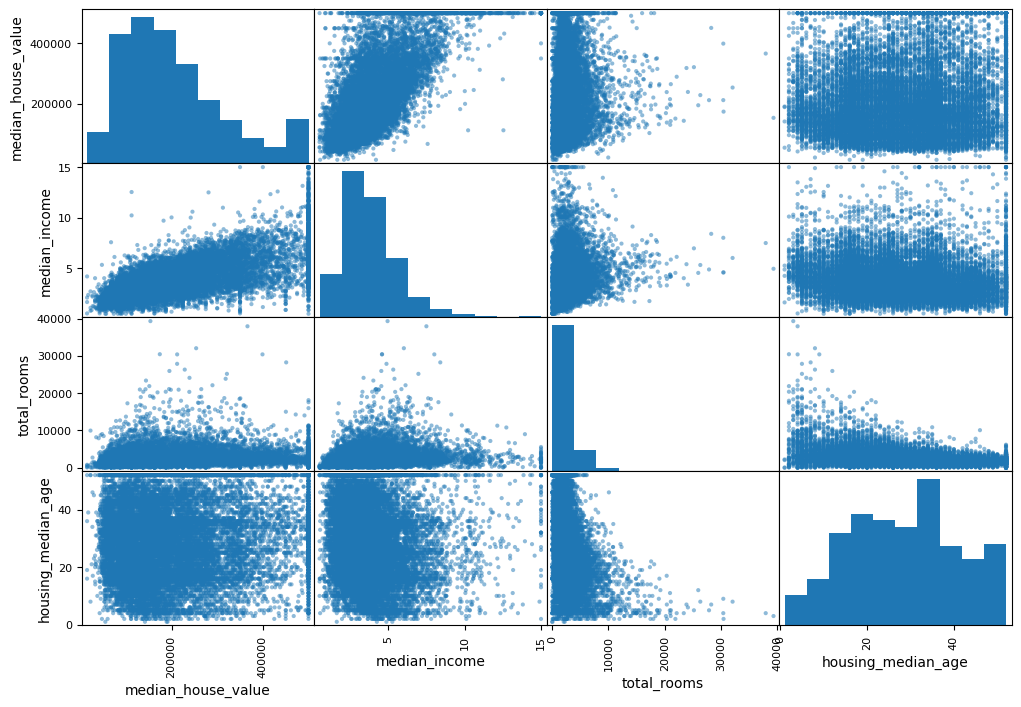

In [43]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [44]:
# since 

In [45]:
corr_matrix = H.corr(numeric_only=True)


In [46]:
import seaborn as sns

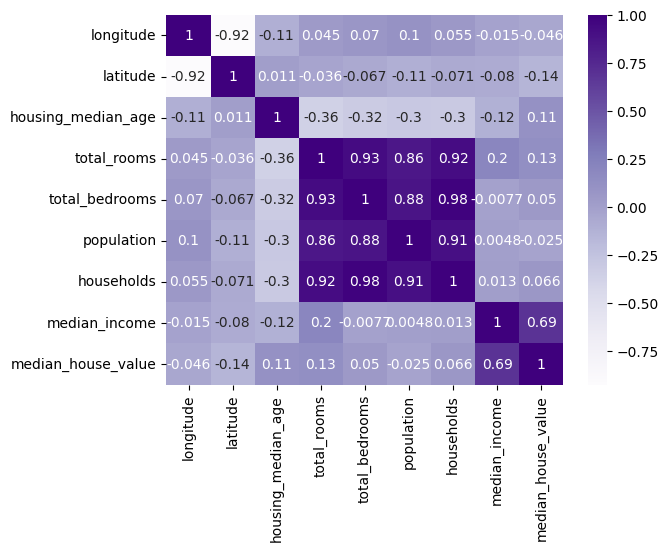

In [47]:
sns.heatmap(corr_matrix, annot=True, cmap = 'Purples')
plt.show()

In [48]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [49]:
# attribute combinations to have string relation when building models 

In [50]:
H["rooms_per_household"] = H["total_rooms"]/H["households"]
H["bedrooms_per_room"] = H["total_bedrooms"]/H["total_rooms"]
H["population_per_household"]=H["population"]/H["households"]

In [51]:
corr_matrix = H.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

/tmp/ipykernel_634706/146532176.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# Preparing data for machine learning

In [52]:
H = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [53]:
median_value = H['total_bedrooms'].median()
# print("Median_value:")
print('Median_value:',median_value)

Median_value: 434.0


In [54]:
H['total_bedrooms'] = H['total_bedrooms'].fillna(median_value)


In [55]:
H.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [57]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [58]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [59]:
X = imputer.transform(housing_num)

In [60]:
# categorical encoding/converting 

In [61]:
housing_cat = H[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
1286           INLAND
18078       <1H OCEAN
4396         NEAR BAY
18031       <1H OCEAN
6753        <1H OCEAN

In [62]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [63]:
# converting sparse matrix into array
housing_cat_1hot.toarray()

# A sparse matrix is a matrix that contains a significant number of zero elements compared to non-zero elements.
# In other words, it is a matrix where most of the entries are zero. 

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

# feature scaling 

In [64]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        def fit(self, X, y=None):
            return self # nothing else to do
        def transform(self, X, y=None):
            rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
            population_per_household = X[:, population_ix] / X[:, households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
                return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
            else:
                return np.c_[X, rooms_per_household, population_per_household]

In [66]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [67]:
# combining all the categorical and numerical transformations together in a single transformer 

In [68]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

# models selections and training the model 

In [69]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [85]:
some_data = housing
some_labels = housing_labels
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [458300. 483800. 101700. ... 148800. 500001. 233300.]


In [86]:


\



print("Labels:", list(some_labels))

Labels: [458300.0, 483800.0, 101700.0, 96100.0, 361800.0, 92600.0, 349300.0, 440900.0, 160100.0, 183900.0, 57500.0, 134600.0, 500001.0, 83100.0, 252000.0, 184000.0, 171400.0, 350000.0, 85700.0, 166500.0, 176200.0, 500001.0, 118500.0, 191700.0, 91400.0, 143800.0, 198200.0, 125000.0, 115200.0, 112500.0, 198900.0, 88200.0, 190200.0, 289300.0, 342000.0, 477200.0, 103800.0, 202400.0, 319100.0, 128500.0, 165100.0, 173300.0, 112600.0, 336900.0, 117600.0, 181300.0, 212500.0, 173400.0, 75900.0, 220600.0, 420000.0, 217700.0, 247200.0, 113200.0, 181700.0, 143800.0, 239300.0, 370000.0, 209600.0, 109400.0, 336400.0, 94200.0, 126800.0, 100800.0, 80100.0, 113800.0, 73000.0, 364800.0, 79800.0, 160600.0, 354300.0, 86900.0, 192200.0, 265900.0, 450000.0, 55500.0, 107900.0, 203200.0, 71800.0, 106300.0, 310000.0, 283200.0, 500001.0, 417600.0, 82800.0, 102100.0, 109900.0, 92700.0, 225000.0, 169300.0, 238300.0, 319300.0, 119100.0, 211700.0, 241200.0, 236100.0, 322000.0, 266400.0, 337500.0, 85900.0, 101900.0,

In [89]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7.139532914944146e-10

In [73]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [74]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [75]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [76]:
from sklearn.metrics import mean_squared_error

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


21.954827422265772

# model fine tuning 

In [77]:
#It trains and evaluates the model for each set of hyperparameters, 
# typically using cross-validation, and returns the combination that yields the best performance.

In [78]:
# Random search offers advantages over grid search in terms of computational efficiency, 
# especially when the hyperparameter space is large and the impact of individual hyperparameters is uncertain.

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [81]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [82]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

27365.577933241522 {'max_features': 2, 'n_estimators': 3}
21297.578316128776 {'max_features': 2, 'n_estimators': 10}
17152.95855762837 {'max_features': 2, 'n_estimators': 30}
14804.647049130665 {'max_features': 4, 'n_estimators': 3}
9680.423092254121 {'max_features': 4, 'n_estimators': 10}
7566.110104448042 {'max_features': 4, 'n_estimators': 30}
6101.291684999316 {'max_features': 6, 'n_estimators': 3}
5108.200379895584 {'max_features': 6, 'n_estimators': 10}
3142.211824404596 {'max_features': 6, 'n_estimators': 30}
3524.773238567057 {'max_features': 8, 'n_estimators': 3}
2454.959819753633 {'max_features': 8, 'n_estimators': 10}
1656.1086319150152 {'max_features': 8, 'n_estimators': 30}
25939.024448742563 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
18062.595521319716 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
19138.20072171224 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
12849.921745250896 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [83]:
# randomixed search , grid seach , baysen - diff methods 

In [84]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

KeyError: "['median_house_value'] not in index"

In [90]:
H

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income ocean_proximity  
13096      1576.0      1034.0         2.0987        NEAR BAY  
14973       666.0       357.0         6.0876       <1H OCEAN  
3785        562.0       203.0         2.4330          INLAND  
14689      1845.0       780.0         2.2618          INLAND  
20507      1912.0      1172.0         3.5292      NEAR OCEAN  
...           ...         ...            ...             ...  
14207       938.0       523.0         4.7105       <1H OCEAN  
13105      1419.0       532.0         2.5733          INLAND  
19301      2814.0       760.0         4.0616      NEAR OCEAN  
19121      1725.0       838.0         4.1455       <1H OCEAN  
19888       682.0       212.0         3.2833      NEAR OCEAN  

[16512 rows x 9 columns]